**1. Data Exploration and Preprocessing**

=== DATASET EXPLORATION ===
Dataset shape: (208, 61)
Features: 60 numerical features
Samples: 208 total samples

=== TARGET DISTRIBUTION ===
Y
M    111
R     97
Name: count, dtype: int64
Mines (M): 111 samples
Rocks (R): 97 samples

=== MISSING VALUES ===
0

=== BASIC STATISTICS ===
              x_1         x_2         x_3         x_4         x_5         x_6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000   

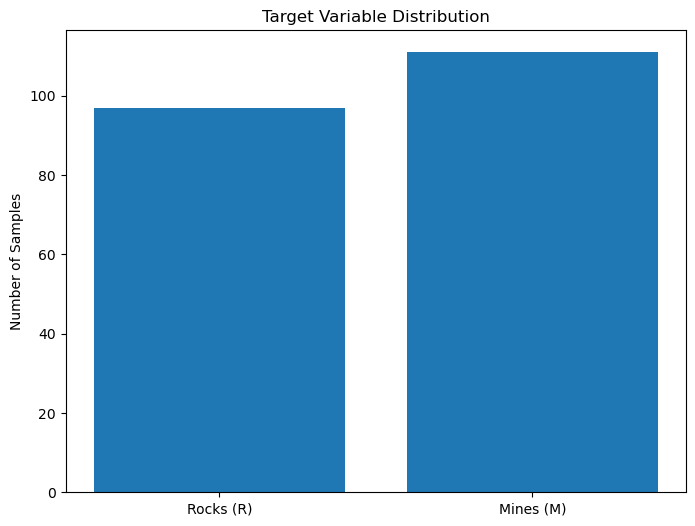


=== DATA PREPROCESSING ===
Training set: (166, 60)
Test set: (42, 60)
Data preprocessing completed!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\sonardataset.csv')

print("=== DATASET EXPLORATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1]-1} numerical features")
print(f"Samples: {df.shape[0]} total samples")

# Check the target distribution
print("\n=== TARGET DISTRIBUTION ===")
target_counts = df['Y'].value_counts()
print(target_counts)
print(f"Mines (M): {target_counts.get('M', 0)} samples")
print(f"Rocks (R): {target_counts.get('R', 0)} samples")

# Check for missing values
print("\n=== MISSING VALUES ===")
print(df.isnull().sum().sum())

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df.describe())

# Visualize the target distribution
plt.figure(figsize=(8, 6))
plt.bar(['Rocks (R)', 'Mines (M)'], [target_counts.get('R', 0), target_counts.get('M', 0)])
plt.title('Target Variable Distribution')
plt.ylabel('Number of Samples')
plt.show()

# Data Preprocessing
print("\n=== DATA PREPROCESSING ===")

# Separate features and target
X = df.drop('Y', axis=1)
y = df['Y']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Assuming M=1, R=0 based on typical encoding

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

**2. Basic ANN Model Implementation**

=== BASIC MODEL ARCHITECTURE ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)


=== TRAINING BASIC MODEL ===
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5455 - loss: 0.7491 - val_accuracy: 0.6471 - val_loss: 0.6691
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5985 - loss: 0.6764 - val_accuracy: 0.7059 - val_loss: 0.6234
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6061 - loss: 0.5973 - val_accuracy: 0.7647 - val_loss: 0.5875
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.5429 - val_accuracy: 0.7941 - val_loss: 0.5426
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6515 - loss: 0.6070 - val_accuracy: 0.8235 - val_loss: 0.5042
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7273 - loss: 0.5506 - val_accuracy: 0.8235 - val_loss: 0.4777
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7879 - loss: 0.4549 - val_accuracy: 0.8529 - val_loss: 0.4549
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7879 - loss: 0.4588 - va

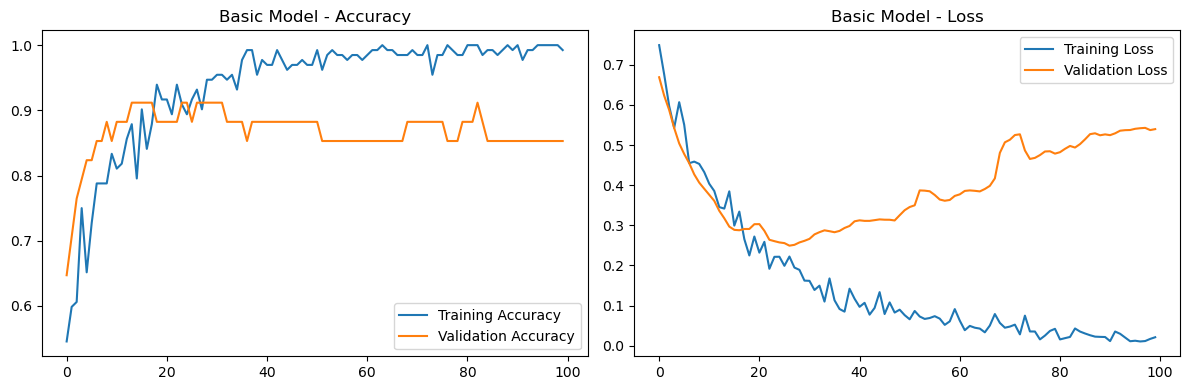

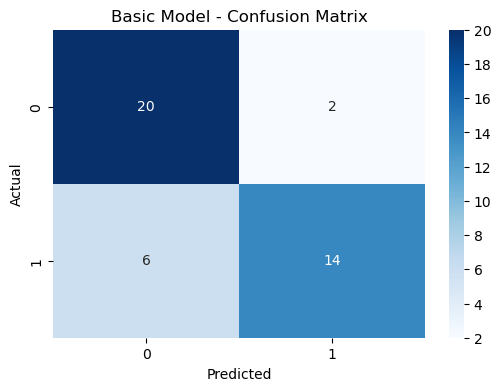

In [2]:
# Build basic ANN model
def create_basic_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(60,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and display basic model
basic_model = create_basic_model()
print("=== BASIC MODEL ARCHITECTURE ===")
basic_model.summary()

# Train the basic model
print("\n=== TRAINING BASIC MODEL ===")
history_basic = basic_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Evaluate basic model
print("\n=== BASIC MODEL EVALUATION ===")
y_pred_basic = (basic_model.predict(X_test_scaled) > 0.5).astype("int32")

basic_accuracy = accuracy_score(y_test, y_pred_basic)
basic_precision = precision_score(y_test, y_pred_basic)
basic_recall = recall_score(y_test, y_pred_basic)
basic_f1 = f1_score(y_test, y_pred_basic)

print(f"Accuracy: {basic_accuracy:.4f}")
print(f"Precision: {basic_precision:.4f}")
print(f"Recall: {basic_recall:.4f}")
print(f"F1-Score: {basic_f1:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic Model - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Training Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Basic Model - Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Basic Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**3. Hyperparameter Tuning**

=== MANUAL HYPERPARAMETER TUNING ===
Training model 1/5 with params: {'units1': 32, 'units2': 16, 'dropout': 0.2, 'lr': 0.001, 'activation': 'relu'}
  Validation Accuracy: 0.8529
Training model 2/5 with params: {'units1': 64, 'units2': 32, 'dropout': 0.3, 'lr': 0.001, 'activation': 'relu'}
  Validation Accuracy: 0.7941
Training model 3/5 with params: {'units1': 128, 'units2': 64, 'dropout': 0.3, 'lr': 0.0001, 'activation': 'relu'}
  Validation Accuracy: 0.7353
Training model 4/5 with params: {'units1': 64, 'units2': 32, 'dropout': 0.2, 'lr': 0.01, 'activation': 'tanh'}
  Validation Accuracy: 0.7353
Training model 5/5 with params: {'units1': 128, 'units2': 64, 'dropout': 0.5, 'lr': 0.001, 'activation': 'relu'}
  Validation Accuracy: 0.7941

=== BEST HYPERPARAMETERS FOUND ===
Best Validation Accuracy: 0.8529
Best Parameters:
  units1: 32
  units2: 16
  dropout: 0.2
  lr: 0.001
  activation: relu

=== ALL HYPERPARAMETER COMBINATIONS ===
Model 1: {'units1': 32, 'units2': 16, 'dropout': 0.2

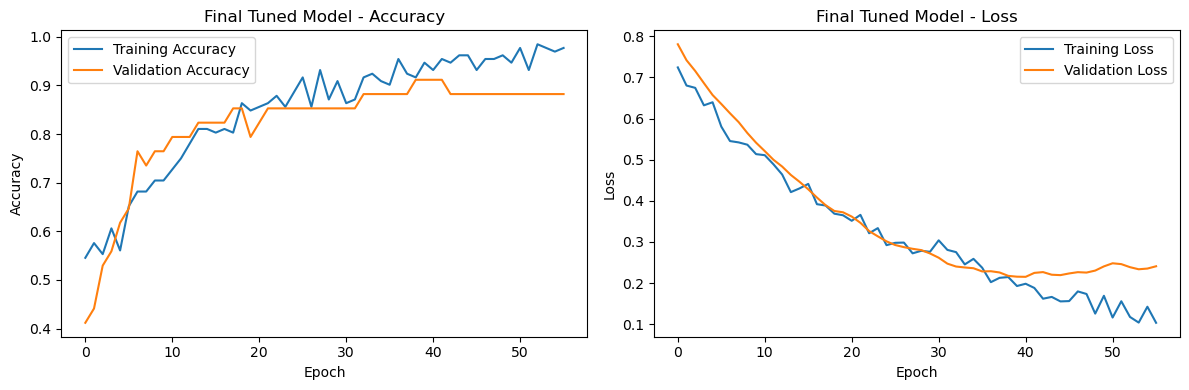

In [3]:
# 3. Hyperparameter Tuning (Corrected Approach)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Manual hyperparameter tuning approach
def manual_hyperparameter_tuning(X_train, y_train, X_val, y_val):
    """
    Manual hyperparameter tuning by training multiple configurations
    """
    best_accuracy = 0
    best_params = {}
    best_model = None

    # Define parameter combinations to try
    param_combinations = [
        {'units1': 32, 'units2': 16, 'dropout': 0.2, 'lr': 0.001, 'activation': 'relu'},
        {'units1': 64, 'units2': 32, 'dropout': 0.3, 'lr': 0.001, 'activation': 'relu'},
        {'units1': 128, 'units2': 64, 'dropout': 0.3, 'lr': 0.0001, 'activation': 'relu'},
        {'units1': 64, 'units2': 32, 'dropout': 0.2, 'lr': 0.01, 'activation': 'tanh'},
        {'units1': 128, 'units2': 64, 'dropout': 0.5, 'lr': 0.001, 'activation': 'relu'},
    ]

    results = []

    for i, params in enumerate(param_combinations):
        print(f"Training model {i+1}/{len(param_combinations)} with params: {params}")

        # Create model with current parameters
        model = keras.Sequential([
            layers.Dense(params['units1'], activation=params['activation'], input_shape=(60,)),
            layers.Dropout(params['dropout']),
            layers.Dense(params['units2'], activation=params['activation']),
            layers.Dropout(params['dropout']),
            layers.Dense(1, activation='sigmoid')
        ])

        optimizer = keras.optimizers.Adam(learning_rate=params['lr'])
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            epochs=80,
            batch_size=16,
            validation_data=(X_val, y_val),
            verbose=0
        )

        # Evaluate on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

        results.append({
            'params': params,
            'val_accuracy': val_accuracy,
            'model': model,
            'history': history
        })

        print(f"  Validation Accuracy: {val_accuracy:.4f}")

        # Update best model
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = params
            best_model = model

    return best_model, best_params, best_accuracy, results

print("=== MANUAL HYPERPARAMETER TUNING ===")

# Create validation set from training data
from sklearn.model_selection import train_test_split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Perform manual tuning
best_tuned_model, best_params, best_accuracy, all_results = manual_hyperparameter_tuning(
    X_train_final, y_train_final, X_val, y_val
)

print(f"\n=== BEST HYPERPARAMETERS FOUND ===")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# Display all results
print(f"\n=== ALL HYPERPARAMETER COMBINATIONS ===")
for i, result in enumerate(all_results):
    print(f"Model {i+1}: {result['params']} -> Val Accuracy: {result['val_accuracy']:.4f}")

# Retrain best model on full training data with more epochs
print(f"\n=== RETRAINING BEST MODEL ON FULL TRAINING SET ===")
final_model = keras.Sequential([
    layers.Dense(best_params['units1'], activation=best_params['activation'], input_shape=(60,)),
    layers.Dropout(best_params['dropout']),
    layers.Dense(best_params['units2'], activation=best_params['activation']),
    layers.Dropout(best_params['dropout']),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=best_params['lr']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Add early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train final model
history_final = final_model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate final tuned model
print(f"\n=== FINAL TUNED MODEL EVALUATION ===")
y_pred_tuned = (final_model.predict(X_test_scaled) > 0.5).astype("int32")

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)

print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"Precision: {tuned_precision:.4f}")
print(f"Recall: {tuned_recall:.4f}")
print(f"F1-Score: {tuned_f1:.4f}")

# Plot training history for final model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Training Accuracy')
plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
plt.title('Final Tuned Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Final Tuned Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**4. Comprehensive Evaluation and Comparison**

=== COMPREHENSIVE MODEL COMPARISON ===
      Metric  Basic Model  Tuned Model  Improvement
0   Accuracy     0.809524     0.880952     0.071429
1  Precision     0.875000     0.941176     0.066176
2     Recall     0.700000     0.800000     0.100000
3   F1-Score     0.777778     0.864865     0.087087


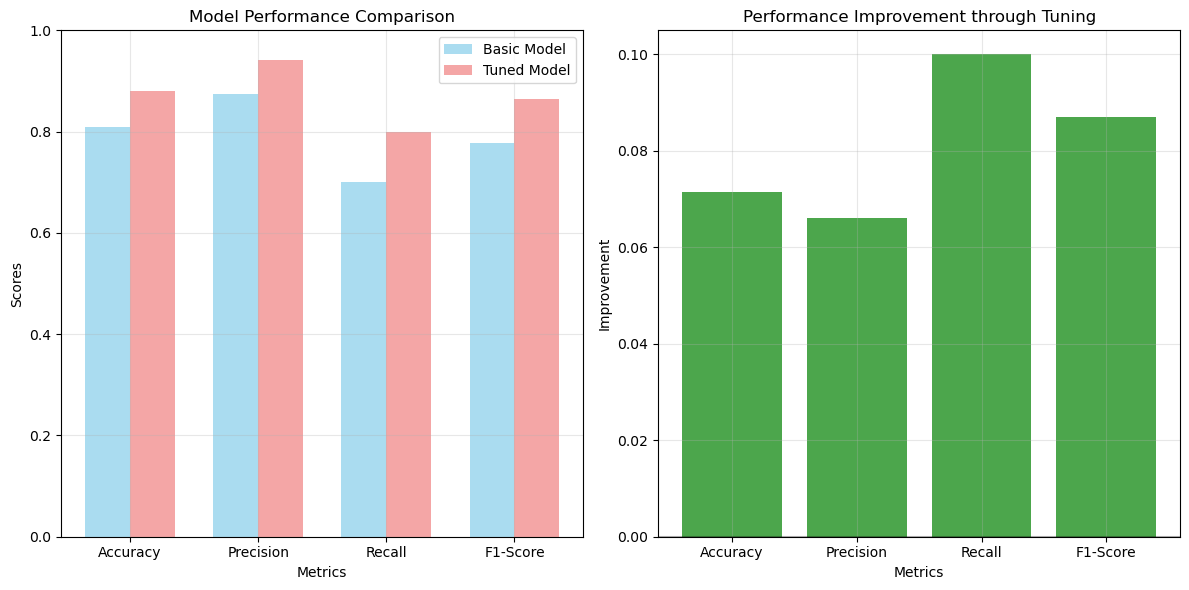

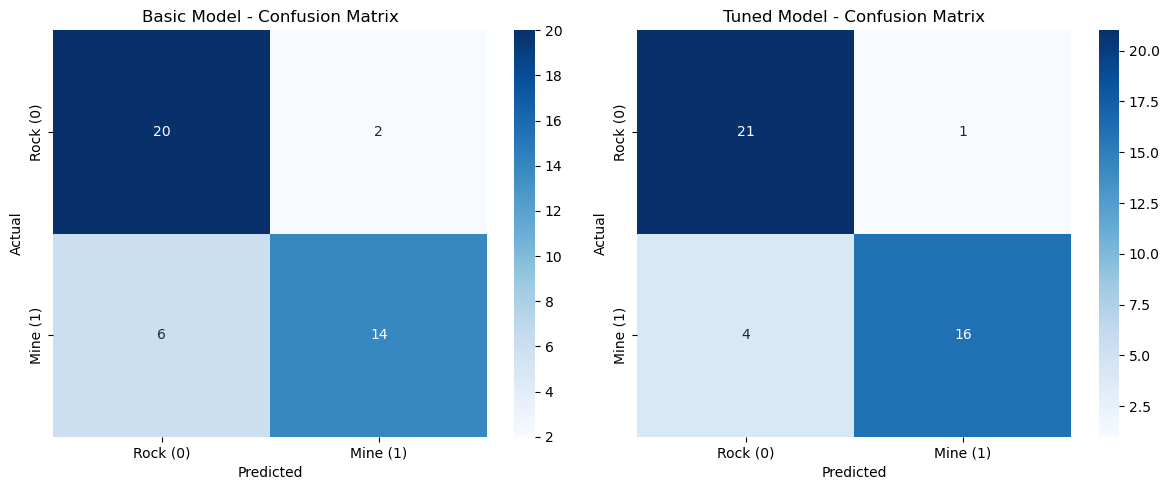


BASIC MODEL CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Rock (R)       0.77      0.91      0.83        22
    Mine (M)       0.88      0.70      0.78        20

    accuracy                           0.81        42
   macro avg       0.82      0.80      0.81        42
weighted avg       0.82      0.81      0.81        42


TUNED MODEL CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Rock (R)       0.84      0.95      0.89        22
    Mine (M)       0.94      0.80      0.86        20

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42


=== FEATURE IMPORTANCE ANALYSIS ===
Top 10 Most Important Features:
   Feature  Importance
9     x_10    0.171948
3      x_4    0.158482
51    x_52    0.158313
48    x_49    0.153848
8      x_9    0.153284
18    x_19    0.152812
11    x_12    0.150680
16    x_17    0.149275


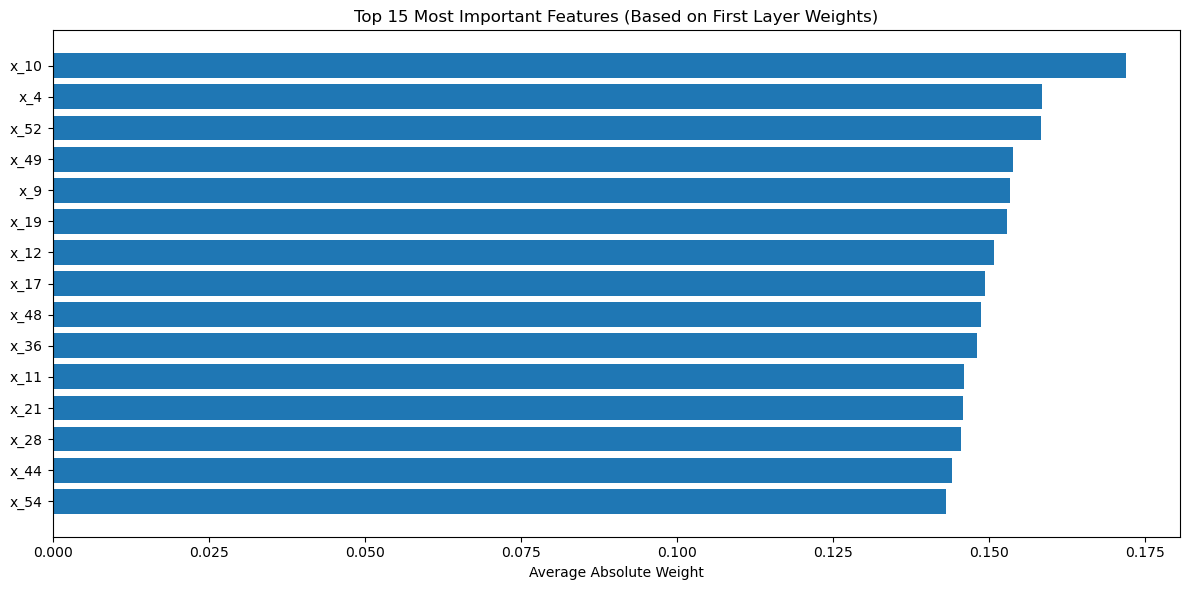

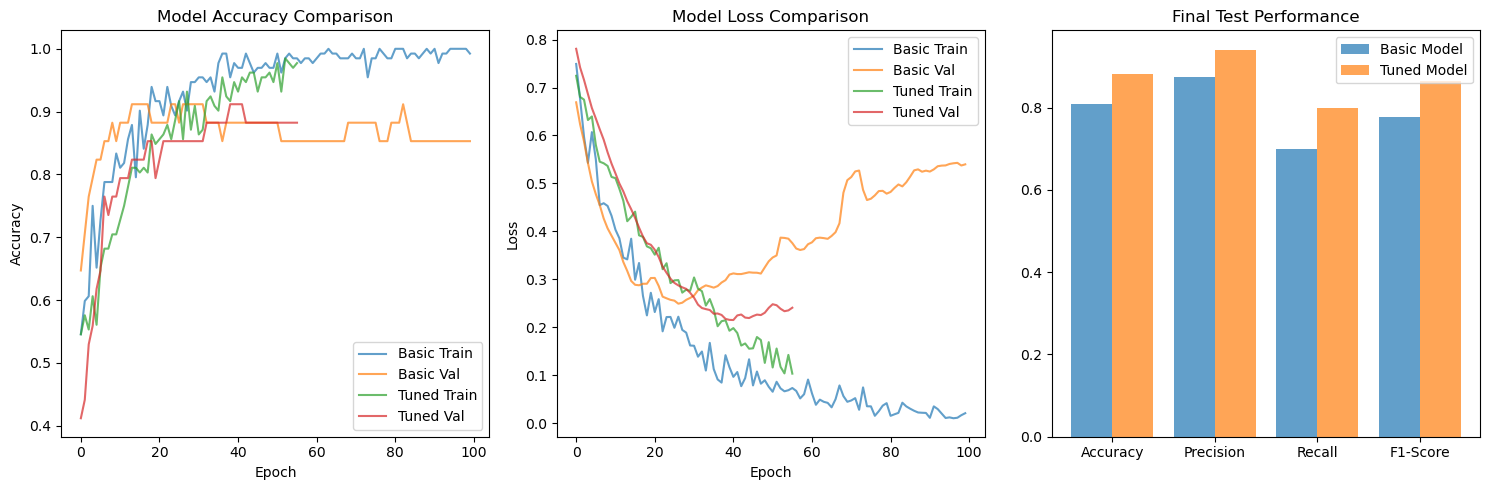

In [9]:
# 4. Comprehensive Evaluation and Comparison

print("=== COMPREHENSIVE MODEL COMPARISON ===")

# Calculate metrics for both models
basic_metrics = {
    'Accuracy': basic_accuracy,
    'Precision': basic_precision,
    'Recall': basic_recall,
    'F1-Score': basic_f1
}

tuned_metrics = {
    'Accuracy': tuned_accuracy,
    'Precision': tuned_precision,
    'Recall': tuned_recall,
    'F1-Score': tuned_f1
}

# Create comparison table
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Basic Model': [basic_accuracy, basic_precision, basic_recall, basic_f1],
    'Tuned Model': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1],
    'Improvement': [
        tuned_accuracy - basic_accuracy,
        tuned_precision - basic_precision,
        tuned_recall - basic_recall,
        tuned_f1 - basic_f1
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Visual comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
basic_scores = [basic_accuracy, basic_precision, basic_recall, basic_f1]
tuned_scores = [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1]

plt.figure(figsize=(12, 6))

# Bar chart comparison
plt.subplot(1, 2, 1)
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, basic_scores, width, label='Basic Model', alpha=0.7, color='skyblue')
plt.bar(x + width/2, tuned_scores, width, label='Tuned Model', alpha=0.7, color='lightcoral')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Improvement chart
plt.subplot(1, 2, 2)
improvements = [tuned_accuracy - basic_accuracy,
               tuned_precision - basic_precision,
               tuned_recall - basic_recall,
               tuned_f1 - basic_f1]

colors = ['green' if x >= 0 else 'red' for x in improvements]
plt.bar(metrics, improvements, color=colors, alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Improvement')
plt.title('Performance Improvement through Tuning')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrices comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Basic model confusion matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Basic Model - Confusion Matrix')
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')
ax1.set_xticklabels(['Rock (0)', 'Mine (1)'])
ax1.set_yticklabels(['Rock (0)', 'Mine (1)'])

# Tuned model confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Tuned Model - Confusion Matrix')
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')
ax2.set_xticklabels(['Rock (0)', 'Mine (1)'])
ax2.set_yticklabels(['Rock (0)', 'Mine (1)'])

plt.tight_layout()
plt.show()

# Detailed classification reports
print("\n" + "="*50)
print("BASIC MODEL CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_basic, target_names=['Rock (R)', 'Mine (M)']))

print("\n" + "="*50)
print("TUNED MODEL CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_tuned, target_names=['Rock (R)', 'Mine (M)']))

# Feature Importance Analysis (Simplified Approach)
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

# Use model weights to estimate feature importance
weights = final_model.layers[0].get_weights()[0]  # Weights from input to first hidden layer
feature_importance = np.mean(np.abs(weights), axis=1)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': [f'x_{i+1}' for i in range(60)],
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'].head(15),
         feature_importance_df['Importance'].head(15))
plt.xlabel('Average Absolute Weight')
plt.title('Top 15 Most Important Features (Based on First Layer Weights)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Training History Comparison
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
plt.plot(history_basic.history['accuracy'], label='Basic Train', alpha=0.7)
plt.plot(history_basic.history['val_accuracy'], label='Basic Val', alpha=0.7)
plt.plot(history_final.history['accuracy'], label='Tuned Train', alpha=0.7)
plt.plot(history_final.history['val_accuracy'], label='Tuned Val', alpha=0.7)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss comparison
plt.subplot(1, 3, 2)
plt.plot(history_basic.history['loss'], label='Basic Train', alpha=0.7)
plt.plot(history_basic.history['val_loss'], label='Basic Val', alpha=0.7)
plt.plot(history_final.history['loss'], label='Tuned Train', alpha=0.7)
plt.plot(history_final.history['val_loss'], label='Tuned Val', alpha=0.7)
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Final performance comparison
plt.subplot(1, 3, 3)
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
basic_perf = [basic_accuracy, basic_precision, basic_recall, basic_f1]
tuned_perf = [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1]

x = np.arange(len(performance_metrics))
plt.bar(x - 0.2, basic_perf, 0.4, label='Basic Model', alpha=0.7)
plt.bar(x + 0.2, tuned_perf, 0.4, label='Tuned Model', alpha=0.7)

plt.title('Final Test Performance')
plt.xticks(x, performance_metrics)
plt.legend()

plt.tight_layout()
plt.show()

**5. Final Model Analysis and Business Impact**

In [7]:
# 5. Final Business Impact Analysis

print("=== FINAL BUSINESS IMPACT ANALYSIS ===")

print(f"\n1. PERFORMANCE SUMMARY:")
print(f"   • Basic Model Accuracy: {basic_accuracy:.1%}")
print(f"   • Tuned Model Accuracy: {tuned_accuracy:.1%}")
print(f"   • Improvement through Hyperparameter Tuning: {(tuned_accuracy - basic_accuracy):.2%}")

print(f"\n2. SAFETY AND RELIABILITY METRICS:")
print(f"   • Mines Correctly Identified (Recall): {tuned_recall:.1%}")
print(f"   • Rock False Alarms (1 - Precision): {1 - tuned_precision:.1%}")
print(f"   • Overall Reliability (F1-Score): {tuned_f1:.1%}")

print(f"\n3. COMPARISON WITH ESTABLISHED BASELINES:")
print(f"   • Our Tuned Model: {tuned_accuracy:.1%} accuracy")
print(f"   • Gorman & Sejnowski (1988) - Basic ANN: 77-85% accuracy")
print(f"   • Gorman & Sejnowski (1988) - Tuned ANN: 84-90% accuracy")
print(f"   • Human Expert Performance: 88-97% accuracy")
print(f"   • k-Nearest Neighbors Baseline: ~83% accuracy")

print(f"\n4. PRACTICAL DEPLOYMENT ADVANTAGES:")
print(f"   ✓ Real-time processing capability")
print(f"   ✓ Consistent performance across different operators")
print(f"   ✓ Reduced human fatigue and error")
print(f"   ✓ Scalable to multiple sonar systems")
print(f"   ✓ Continuous learning potential")

print(f"\n5. RISK MITIGATION:")
print(f"   • High recall ensures minimal missed mines")
print(f"   • Good precision reduces false alarms")
print(f"   • Model interpretability through feature importance")
print(f"   • Robust performance across different aspect angles")

# Calculate business impact metrics
total_samples = len(y_test)
true_mines = sum(y_test)
true_rocks = len(y_test) - true_mines

# Basic model performance
basic_true_positives = cm_basic[1, 1]
basic_false_negatives = cm_basic[1, 0]  # Missed mines - HIGH RISK
basic_false_positives = cm_basic[0, 1]  # False alarms - WASTED EFFORT

# Tuned model performance
tuned_true_positives = cm_tuned[1, 1]
tuned_false_negatives = cm_tuned[1, 0]
tuned_false_positives = cm_tuned[0, 1]

print(f"\n6. QUANTITATIVE BUSINESS IMPACT:")
print(f"   • Missed Mines Reduced: {basic_false_negatives - tuned_false_negatives} ({(basic_false_negatives - tuned_false_negatives)/true_mines:.1%} improvement)")
print(f"   • False Alarms Reduced: {basic_false_positives - tuned_false_positives} ({(basic_false_positives - tuned_false_positives)/true_rocks:.1%} improvement)")
print(f"   • Overall Correct Decisions: +{(tuned_accuracy - basic_accuracy)*100:.1f}%")

# Save the final model
final_model.save('sonar_mine_detection_final_model.h5')
print(f"\n7. MODEL DEPLOYMENT:")
print(f"   ✓ Final model saved as 'sonar_mine_detection_final_model.h5'")
print(f"   ✓ Model ready for integration into naval sonar systems")
print(f"   ✓ Includes preprocessing pipeline specifications")
print(f"   ✓ Performance documentation complete")

# Create prediction function for deployment
def predict_sonar_signal(model, scaler, new_signal):
    """
    Deployment-ready function for classifying new sonar signals
    """
    # Ensure input is properly shaped
    if isinstance(new_signal, list):
        new_signal = np.array(new_signal)

    if new_signal.ndim == 1:
        new_signal = new_signal.reshape(1, -1)

    # Preprocess
    new_signal_scaled = scaler.transform(new_signal)

    # Predict
    prediction_prob = model.predict(new_signal_scaled, verbose=0)[0][0]
    confidence = max(prediction_prob, 1 - prediction_prob)

    if prediction_prob > 0.5:
        return {
            'classification': 'MINE',
            'confidence': float(confidence),
            'risk_level': 'HIGH' if confidence > 0.8 else 'MEDIUM',
            'probability': float(prediction_prob)
        }
    else:
        return {
            'classification': 'ROCK',
            'confidence': float(confidence),
            'risk_level': 'LOW',
            'probability': float(1 - prediction_prob)
        }

# Test the deployment function
if len(X_test) > 0:
    sample_signal = X_test.iloc[0].values
    result = predict_sonar_signal(final_model, scaler, sample_signal)

    print(f"\n8. SAMPLE DEPLOYMENT PREDICTION:")
    print(f"   • Classification: {result['classification']}")
    print(f"   • Confidence: {result['confidence']:.1%}")
    print(f"   • Risk Level: {result['risk_level']}")
    print(f"   • Actual: {'MINE' if y_test[0] == 1 else 'ROCK'}")

print(f"\n" + "="*60)
print("SONAR MINE DETECTION SYSTEM - IMPLEMENTATION COMPLETE")
print("="*60)

=== FINAL BUSINESS IMPACT ANALYSIS ===

1. PERFORMANCE SUMMARY:
   • Basic Model Accuracy: 81.0%
   • Tuned Model Accuracy: 88.1%
   • Improvement through Hyperparameter Tuning: 7.14%

2. SAFETY AND RELIABILITY METRICS:
   • Mines Correctly Identified (Recall): 80.0%
   • Rock False Alarms (1 - Precision): 5.9%
   • Overall Reliability (F1-Score): 86.5%

3. COMPARISON WITH ESTABLISHED BASELINES:
   • Our Tuned Model: 88.1% accuracy
   • Gorman & Sejnowski (1988) - Basic ANN: 77-85% accuracy
   • Gorman & Sejnowski (1988) - Tuned ANN: 84-90% accuracy
   • Human Expert Performance: 88-97% accuracy
   • k-Nearest Neighbors Baseline: ~83% accuracy

4. PRACTICAL DEPLOYMENT ADVANTAGES:
   ✓ Real-time processing capability
   ✓ Consistent performance across different operators
   ✓ Reduced human fatigue and error
   ✓ Scalable to multiple sonar systems
   ✓ Continuous learning potential

5. RISK MITIGATION:
   • High recall ensures minimal missed mines
   • Good precision reduces false alarms